<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Model-Overview" data-toc-modified-id="Model-Overview-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model Overview</a></span></li><li><span><a href="#Methodology" data-toc-modified-id="Methodology-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Methodology</a></span></li><li><span><a href="#Ready,-get-set,-code!-" data-toc-modified-id="Ready,-get-set,-code!--4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Ready, get set, code! </a></span><ul class="toc-item"><li><span><a href="#Installing-Libraries" data-toc-modified-id="Installing-Libraries-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Installing Libraries</a></span></li><li><span><a href="#Loading-Price-Data-and-initial-EDA" data-toc-modified-id="Loading-Price-Data-and-initial-EDA-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Loading Price Data and initial EDA</a></span></li><li><span><a href="#Filtering-the-Price-Data" data-toc-modified-id="Filtering-the-Price-Data-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Filtering the Price Data</a></span></li><li><span><a href="#Model-Training-and-Testing" data-toc-modified-id="Model-Training-and-Testing-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Model Training and Testing</a></span><ul class="toc-item"><li><span><a href="#NBEATS-(horizon=24)" data-toc-modified-id="NBEATS-(horizon=24)-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>NBEATS (horizon=24)</a></span></li><li><span><a href="#NBEATS-(horizon=12)" data-toc-modified-id="NBEATS-(horizon=12)-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>NBEATS (horizon=12)</a></span></li><li><span><a href="#NHITS-(horizon=24)" data-toc-modified-id="NHITS-(horizon=24)-4.4.3"><span class="toc-item-num">4.4.3&nbsp;&nbsp;</span>NHITS (horizon=24)</a></span></li><li><span><a href="#NHITS-(horizon=48)" data-toc-modified-id="NHITS-(horizon=48)-4.4.4"><span class="toc-item-num">4.4.4&nbsp;&nbsp;</span>NHITS (horizon=48)</a></span></li></ul></li></ul></li><li><span><a href="#Results-and-Discussion" data-toc-modified-id="Results-and-Discussion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Results and Discussion</a></span><ul class="toc-item"><li><span><a href="#NBEATS-Results" data-toc-modified-id="NBEATS-Results-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>NBEATS Results</a></span></li><li><span><a href="#NHITS-Results" data-toc-modified-id="NHITS-Results-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>NHITS Results</a></span></li></ul></li><li><span><a href="#Explainability---Demand-Forecasting" data-toc-modified-id="Explainability---Demand-Forecasting-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Explainability - Demand Forecasting</a></span><ul class="toc-item"><li><span><a href="#Loading-Demand-Data" data-toc-modified-id="Loading-Demand-Data-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Loading Demand Data</a></span></li><li><span><a href="#Loading-Weather-Data" data-toc-modified-id="Loading-Weather-Data-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Loading Weather Data</a></span></li><li><span><a href="#Merge-Weather-and-Demand-Data" data-toc-modified-id="Merge-Weather-and-Demand-Data-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Merge Weather and Demand Data</a></span></li><li><span><a href="#SHAP-Implementation" data-toc-modified-id="SHAP-Implementation-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>SHAP Implementation</a></span></li></ul></li><li><span><a href="#Next-Steps" data-toc-modified-id="Next-Steps-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Next Steps</a></span></li></ul></div>

In [34]:
from IPython.display import HTML
HTML('''<script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js "></script><script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
} else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>
''')

<h1 style="background: linear-gradient(to right, #0083b0, #00b4db); padding: 20px; color: white;">
    <span style="font-size: 30px; font-family: Segoe UI, non-serif;">The Future is Now:</span><br>
    <span style="font-size: 22px; font-family: Garamond, serif;">Time Traveler's Guide to PH Energy Market Price Predictions</span>

</h1>

<h2 style="color: #0083b0; font-family: Segoe UI, non-serif;">Introduction</h2>

***
<span style="font-size: 14px; font-family: Segoe UI, non-serif;">
    
In this age of big data and interconnected systems, the ability to forecast future values based on historical patterns is no longer just an option—<b>it's a necessity</b>. Whether it's predicting stock prices, weather patterns, or in our case, energy prices, time series forecasting plays a pivotal role in shaping the decisions and strategies of energy market players.
    
Time series forecasting uses powerful machine learning algorithms to analyze historical data and predict future values. In the Philippines' energy market, this technology can be used to anticipate price movements and identify strategic opportunities. Accurately predicting energy prices allows power companies, suppliers, and traders to make decisions that lead to an optimized portfolio of resources and reduce risk exposure.

<b>In this blog post, we'll provide an overview of time series forecasting in the context of PH energy market price predictions.</b> We will discuss some of the most popular models used for electricity pricing forecasts. Finally, we'll share best practices from experienced data scientists on how to maximize forecast accuracy by combining various techniques into a comprehensive forecasting strategy. By the end of this post, you'll have a better understanding of the various forecasting models and how to use them to make informed decisions in the energy market. 

For aspiring data scientists looking to break into this field, here is a summary of what you can takeaway from this blog:
1. Understand the basics of time series forecasting as it relates to energy pricing predictions
2. Learn about popular forecasting models such as NBEATS, NHITS
3. Consider how senior management can help enhance forecast accuracy through their own strategies and processes
4. Develop an efficient and comprehensive forecasting strategy combining different techniques for maximum accuracy

With the right skills and knowledge, you can use time series forecasting to identify potential opportunities, reduce risk exposure, and make data-driven decisions that lead to success for your company or organization.

Take the plunge into this exciting field and start using time series forecasting to anticipate energy prices today — <i>  Let's get started! </i>
</span>

<h2 style="color: #0083b0; font-family: Segoe UI, non-serif;">Model Overview</h2>

***
<span style="font-size: 14px; font-family: Segoe UI, non-serif;">

As we begin this project, it is crucial to understand first the difference between classical and deep-learning-based methods of forecasting. Classical methods may be the go-to for most analysts, but for this project, we will focus on exploring deep learning-based methods (i.e. using neural networks) because we want our forecasting model to recognize complex relationships and patterns and accurately model non-linear relationships. </span>

<span style="font-size: 14px; font-family: Segoe UI, non-serif;">
    
<u>Time-Series Forecasting: Classical vs Deep Learning </u>

The table below provides a summary contrasting these forecasting methods.</span>
    
|     | <span style="font-size: 14px; font-family: Segoe UI, non-serif;">**Classical methods** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</span>| <span style="font-size: 14px; font-family: Segoe UI, non-serif;">**Deep Learning-based methods**</span> |
|:-------------|:-------------|:-------------| 
|     |<span style="font-size: 14px; font-family: Segoe UI, non-serif;"><i>e.g. Autoregressive Integrated Moving Average (ARIMA)</i></span>|<span style="font-size: 14px; font-family: Segoe UI, non-serif;"><i>e.g. Neural Basis Expansion Analysis (NBEATS)</i></span>| 
| <span style="font-size: 14px; font-family: Segoe UI, non-serif;">**Pros**&nbsp;&nbsp;&nbsp;&nbsp; </span>    |<span style="font-size: 14px; font-family: Segoe UI, non-serif;"> - Transparent and interpretable models. <br> - Well-established statistical techniques. <br> - Suitable for simple data patterns and linear relationships. <br> - Minimal computational requirements. <br> - Can be effective with limited data.</span> | <span style="font-size: 14px; font-family: Segoe UI, non-serif;">- Superior performance in capturing complex patterns and non-linear relationships. <br> - End-to-end learning, reducing the need for manual feature engineering. <br> - Ability to handle large and high-dimensional datasets. <br> - Suitable for irregular and non-stationary data. <br> - Adaptability to changing patterns and long-term dependencies.</span>|
|<span style="font-size: 14px; font-family: Segoe UI, non-serif;"> **Cons**&nbsp;&nbsp;&nbsp;&nbsp; </span>    |<span style="font-size: 14px; font-family: Segoe UI, non-serif;"> - Limited ability to capture complex patterns and non-linear relationships. <br> - Reliance on manual feature engineering. <br> - May struggle with irregular or non-stationary data. <br> - Limited performance on large and high-dimensional datasets.</span>|<span style="font-size: 14px; font-family: Segoe UI, non-serif;"> - Lack of interpretability and transparency in the internal workings of models. <br> - Requires large amounts of training data for optimal performance. <br> - Computational complexity and resource-intensive training. <br> - Risk of overfitting with insufficient data. <br> - Challenges in explaining results to stakeholders.</span>|

<span style="font-size: 14px; font-family: Segoe UI, non-serif;">

Now, let us briefly define the forecasting models we will use in this project.

<span style="font-size: 14px; font-family: Segoe UI, non-serif;">

<b><u>Neural Basis Expansion Analysis (NBEATS)</u></b>

NBEATS was proposed by researchers from ElementAI and has achieved state-of-the-art results on the M4 dataset, which is a collection of 100,000 time series from various domains. The M competitions are a prestigious series of forecasting challenges organised to compare and advance forecasting research. In the past, statistical algorithms have always won it. Tried and tested models like ARIMA and Exponential Smoothing produce predictions that were hard to beat by more complex but less accurate algorithms. <br>
(Neo Yi Peng, ["Unraveling the Power of N-BEATS", Towards Data Science](https://towardsdatascience.com/n-beats-beating-statistical-models-with-neural-nets-28a4ba4a4de8)).

But this all changed last year, <b>NBEATS proved state-of-the-art performance on the M3, M4, and Tourism Competition datasets, improving accuracy by 3% over the ESRNN M4 competition winner.</b>

Below is a more technical definition of NBEATS: (from [Nixtla](https://nixtla.github.io/neuralforecast/models.nbeats.html))
- an MLP(multilayer perceptron)-based deep neural architecture with backward and forward residual links.
- The network has two variants: (1) in its interpretable configuration, NBEATS sequentially projects the signal into polynomials and harmonic basis to learn trend and seasonality components; (2) in its generic configuration, it substitutes the polynomial and harmonic basis for identity basis and larger network’s depth. 
</span>    
<br>
<img src="https://nixtla.github.io/neuralforecast/imgs_models/nbeats.png" alt="NBEATS Architecture" width="600">


<div style="text-align: center; color: gray; font-size: 14px; font-family: Segoe UI, sans-serif;">
Figure 1. Neural Basis Expansion Analysis (NBEATS) Architecture
</div>

<span style="font-size: 14px; font-family: Segoe UI, non-serif;">

<b><u>Neural Hierarchical Interpolation for Time Series (NHITS)</u></b>

NHITS is a <b>neural network model for long-horizon time series forecasting that extends NBEATS by using hierarchical interpolation and multi-rate input processing to capture the different frequencies of the data.</b> It was proposed by researchers from Nixtla and has achieved state-of-the-art results on the M5 dataset, which is a collection of 42,840 time series from Walmart sales data. 
    
One article that describes NHITS and its performance on the M5 dataset, NHITS beat the previous winner of the M5 competition, LightGBM, which is a gradient boosting framework. Some of the models that NHITS beat are: LightGBM: Light Gradient Boosting Machine, DeepAR: Deep Autoregressive Neural Networks, Prophet: Facebook’s forecasting tool ARIMA: Autoregressive Integrated Moving Average. ([Challu et al., 2022](https://doi.org/10.48550/arXiv.2201.12886))

Below is a more technical definition of NHITS: (from [Nixtla](https://nixtla.github.io/neuralforecast/models.nhits.html))
- The model is composed of several MLPs with ReLU non-linearities. 
- Blocks are connected via doubly residual stacking principle with the backcast and forecast outputs of the l-th block. Multi-rate input pooling, hierarchical interpolation and backcast residual connections together induce the specialization of the additive predictions in different signal bands, reducing memory footprint and computational time, thus improving the architecture parsimony and accuracy.
- NHITS is suited for long-horizon forecasting where it is more challenging because of the volatility of the predictions and its computational complexity.

</span>    
<br>
<img src="https://nixtla.github.io/neuralforecast/imgs_models/nhits.png" alt="NHITS Architecture" width="600">


<div style="text-align: center; color: gray; font-size: 14px; font-family: Segoe UI, sans-serif;">
Figure 2. Neural Hierarchical Interpolation for Time Series (NHITS) Architecture
</div>

<h2 style="color: #0083b0; font-family: Segoe UI, non-serif;">Methodology</h2>

***
<span style="font-size: 14px; font-family: Segoe UI, non-serif;">

The main objective of this project is to compare the performance (accuracy) of deep learning models and gather insights on how forecasting might be further improved. We will proceed with the following steps: </span>
    
!["Project Methodology"](project_methodology.png)

<h2 style="color: #0083b0; font-family: Segoe UI, non-serif;">Ready, get set, code! </h2>

***
<span style="font-size: 14px; font-family: Segoe UI, non-serif;">

We have prepared a GitHub repository containing the datasets and notebook.<br>To clone the GitHub repository on your device, follow the following steps: 

1. Open Git Bash.
2. Change the current working directory to the location where you want the cloned directory.
3. Type git clone, and then paste the URL: https://github.com/jdumali/wesm-nbeats.git
4. Press Enter to create your local clone.

</span>

<h3 style="color: #0083b0; font-family: Segoe UI, non-serif;">Installing Libraries</h3>

<span style="font-size: 14px; font-family: Segoe UI, non-serif;">
First, we need to install the necessary libraries: neuralforecast and pytorch. These libraries will be used for applying NBEATS and NHITS model to our dataset.
</span>

In [7]:
%%capture
!pip install pytorch_lightning

In [8]:
%%capture
!pip install git+https://github.com/Nixtla/neuralforecast.git@main

In [9]:
%%capture
!pip install shap

<span style="font-size: 14px; font-family: Segoe UI, non-serif;">
Additionally, use a GPU as we work together on this project. GPUs’ computational power can make neural network codes run much faster, enabling quicker model training and more efficient predictions.
<br><br>
Next, we import libraries we will use for the project.</span>

In [10]:
%%capture
import numpy as np
import pandas as pd
import datetime
import pytorch_lightning as pl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS, NBEATSx
from neuralforecast.losses.pytorch import MQLoss
from neuralforecast.tsdataset import TimeSeriesDataset

from neuralforecast.losses.numpy import (
    mae,              # unscaled errors
    mape              # percentage errors
)

import warnings
warnings.filterwarnings('ignore')

import shap

<h3 style="color: #0083b0; font-family: Segoe UI, non-serif;">Loading Price Data and initial EDA</h3>

<span style="font-size: 14px; font-family: Segoe UI, non-serif;">

Our LWAP dataset is extracted from the IEMOP (Independent Electricity Market Operator of the Philippines) website. LWAP (Load Weighted Average Price) basically signifies the average price of electricity traded from various points in the electricity system and at different trading hours/intervals. In the new market management system (NMMS), trading is done in 5-minute intervals. For this study, we aggregated the data to hourly intervals. 

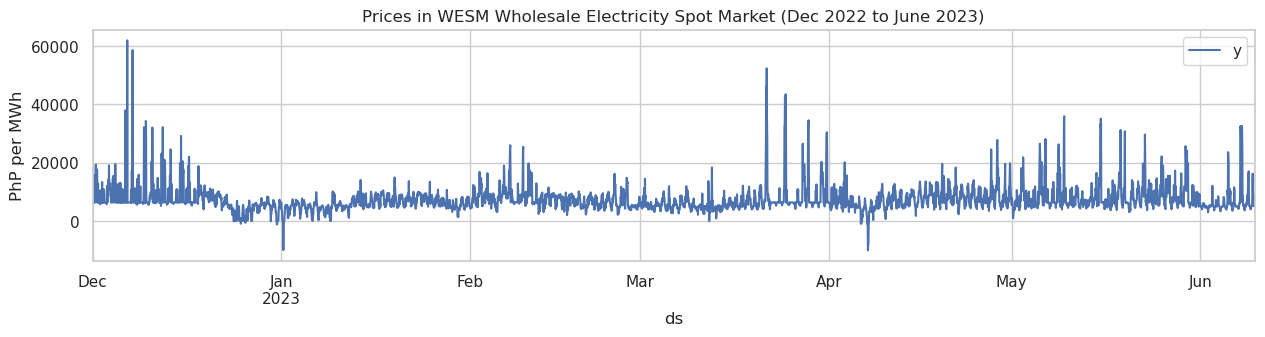

In [25]:
# Read CSV file
lwap = pd.read_csv('PROD_RAW_NMMS_PUB_LWAP_122022_062023.csv', 
                   usecols=['TIME_INTERVAL','TRADING_DAY','TRADING_HOUR','TRADING_MINUTE','REGION_NAME','LWAP'])
lwap['TIME_INTERVAL'] = pd.to_datetime(lwap['TIME_INTERVAL'])

# Try to use CLUZ timeseries first
lwap_cluz = lwap[lwap['REGION_NAME'] == 'CLUZ']
lwap_cluz.set_index('TIME_INTERVAL', inplace=True)
lwap_cluz.sort_index(inplace=True)
lwap_cluz = lwap_cluz.drop_duplicates()

# Adjust 'TRADING_HOUR' by one hour prior to converting to datetime column
lwap_cluz['TRADING_HOUR'] = lwap_cluz['TRADING_HOUR'] - 1

# Aggregate to hourly
lwap_cluz = lwap_cluz.groupby(['TRADING_DAY','TRADING_HOUR']).agg({'LWAP':'mean',
                                                                  'REGION_NAME':'first'}).reset_index()

# Add 'ds' datetime column, set as index
lwap_cluz['TRADING_HOUR'] = lwap_cluz['TRADING_HOUR'].apply(lambda x: str(x).zfill(2))
lwap_cluz['ds'] = pd.to_datetime(lwap_cluz['TRADING_DAY'] + ' ' + lwap_cluz['TRADING_HOUR'], format='%Y-%m-%d %H')
lwap_cluz.drop(['TRADING_DAY','TRADING_HOUR'], axis=1, inplace=True)
lwap_cluz.set_index('ds', inplace=True)

lwap_cluz = lwap_cluz[lwap_cluz.columns[-1:].append(lwap_cluz.columns[:-1])]
lwap_cluz.rename(columns={'LWAP':'y', 'REGION_NAME':'unique_id'}, inplace=True)

# Plotting the data
lwap_cluz.plot(figsize=(15,3))
plt.title('Prices in WESM Wholesale Electricity Spot Market (Dec 2022 to June 2023)')
plt.ylabel('PhP per MWh')
plt.show()

In [31]:
# Calculate the standard deviation
std_dev = lwap_cluz.std()

# Calculate the variance
variance = lwap_cluz.var()

print("Standard Deviation:", std_dev[0], "\nVariance:", variance[0])

Standard Deviation: 4351.098233771717 
Variance: 18932055.839931358


In [30]:
lwap_cluz.index = pd.to_datetime(lwap_cluz.index)

# Group by month and calculate the mean
lwap_cluz_monthly = lwap_cluz.resample('M').mean()

# Print the resulting DataFrame
print(lwap_cluz_monthly)

                      y
ds                     
2022-12-31  7558.205778
2023-01-31  6000.745721
2023-02-28  7544.646894
2023-03-31  7142.347939
2023-04-30  7540.976215
2023-05-31  8697.306172
2023-06-30  6810.558166


<span style="font-size: 14px; font-family: Segoe UI, non-serif;">
The standard deviation of 4351.1 and the variance of 1.89 x 10<sup>7</sup> imply that this electricity market is highly volatile and unpredictable. This means that prices can vary significantly from day to day, which could make it a risky investment for those not familiar with the market. Knowing the standard deviation and variance can help investors better plan their investments by allowing them to anticipate potential losses or gains based on these measurement. Furthermore, the range of possible values (-10,000 to 32,000) further confirms that this is indeed a high-risk market. Therefore, it is important for investors to be aware of these fluctuations and take them into consideration when making decisions. By doing so, they can minimize their losses and maximize their gains in this electricity market. 

In conclusion, standard deviation and variance are two important measures to consider when investing in the electricity market due to its high degree of volatility. Understanding these two metrics can also be helpful in predicting future price movements in the market, as they give us an indication of how much variation there could be from one day to the next.

<h3 style="color: #0083b0; font-family: Segoe UI, non-serif;">Filtering the Price Data</h3>

<span style="font-size: 14px; font-family: Segoe UI, non-serif;">
    
As summer season approaches, understanding the underlying factors that contribute to fluctuating electricity prices in the Wholesale Electricity Spot Market (WESM) is more important than ever. To gain a clearer picture of these trends, we can take a closer look at individual time intervals or time steps within WESM's broader timeseries plot from January 1, 2023 to June 30, 2023. 

Let's focus on the first quarter of 2023 (Jan 1st - March 15, 2023). This will allow us to accurately analyze any price changes before summer season kicks off in the Philippines. During this period, demand for electricity tends to be significantly higher due to increased air conditioning usage and other seasonal activities; thus prices begin to climb. 

Analyzing the data from January to March can provide us with valuable insight on how prices fluctuate in relation to demand, and help us make informed predictions about electricity prices during summer season. By understanding the underlying factors that drive price changes, we can ensure our businesses are prepared for any future market shifts. 

The code below filters the data from <u>January 1, 2023 to March 15, 2023.</u>
</span>

In [12]:
# Read the csv file
lwap_cluz = pd.read_csv('lwap_cluz_2023Q1.csv')
lwap_cluz['ds'] = pd.to_datetime(lwap_cluz['ds'])
lwap_cluz.set_index('ds', inplace=True)

In [13]:
# Set the Start and End-Date
start_date = '2023-01-01 00:00:00'
end_date = '2023-03-15 23:00:00'

In [17]:
ts_lwap_cluz = lwap_cluz.copy()
ts_lwap_cluz.index = pd.to_datetime(ts_lwap_cluz.index)

mask = (ts_lwap_cluz.index >= start_date) & (ts_lwap_cluz.index <= end_date)
ts_lwap_cluz = ts_lwap_cluz.loc[mask]

ts_lwap_cluz['y'] = ts_lwap_cluz['y'].apply(lambda x: min(max(x, -10000), 32000))

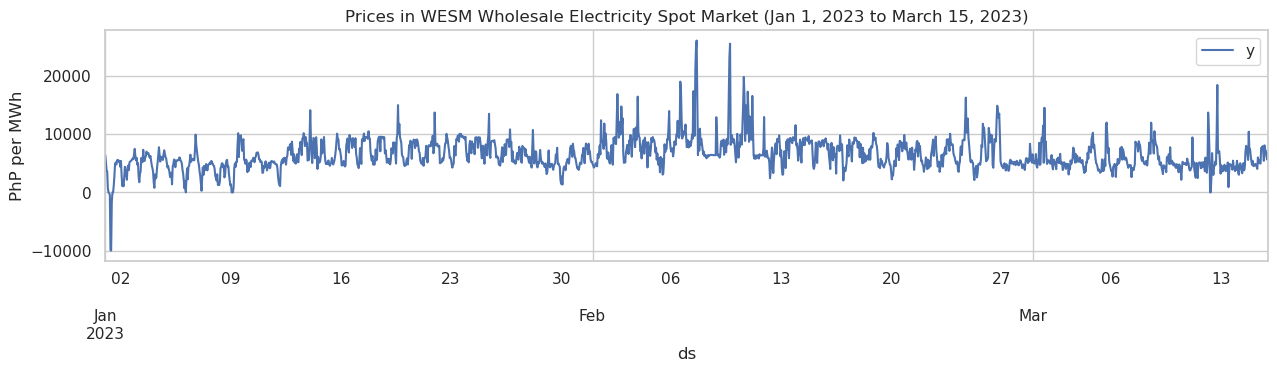

In [35]:
ts_lwap_cluz.plot(figsize=(15,3))
plt.title('Prices in WESM Wholesale Electricity Spot Market (Jan 1, 2023 to March 15, 2023)')
plt.ylabel('PhP per MWh')
plt.show()

In [36]:
ts_lwap_cluz.reset_index(inplace=True)
ts_lwap_cluz.rename(columns={'index':'ds'}, inplace=True)

<h3 style="color: #0083b0; font-family: Segoe UI, non-serif;">Model Training and Testing</h3>

***

<span style="font-size: 14px; font-family: Segoe UI, non-serif;">
    
It's time to train and test our models! We will use the NBEATS and NHITS models here, which automatically processes our data and generates forecasts. We will be applying the models using different horizons (e.g. timesteps that we will predict).
    
Below is a summary of our experiment runs: 
- NBEATS (horizon = 24)
- NBEATS (horizon = 12)
- NHITS (horizon = 24)
- NHITS (horizon = 48)

This section is code-heavy. You may proceed to the next section: <b>Results and Discussion</b> to dig into the insights of our experimentation. 
</span>

<h4 style="color: #0083b0; font-family: Segoe UI, non-serif;">NBEATS (horizon=24)</h4>

In [48]:
%%capture
Y_train_df = ts_lwap_cluz[:-24]
Y_test_df = ts_lwap_cluz[-24:]

horizon = 24 #multi-step forecast
model = NBEATS(h=horizon,                   # Forecast horizon
                input_size=7 * horizon,      # Length of input sequence
                loss=MQLoss(level=[90]),
                scaler_type='minmax',
                max_steps=100)

nf = NeuralForecast(
    models=[model],
    freq='H'
)

nf.fit(df=Y_train_df, val_size=48)
Y_hat_df = nf.predict(futr_df=Y_test_df)

[]

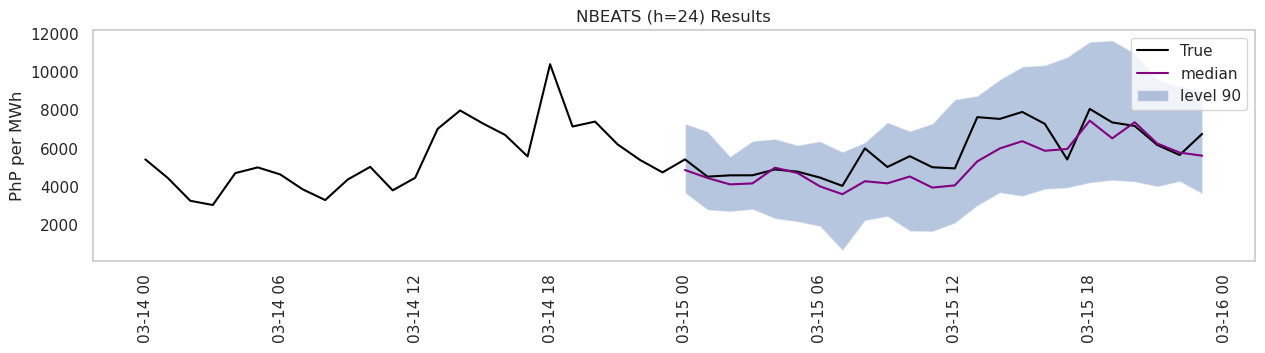

In [49]:
# Plot quantile predictions
plot_df = Y_test_df.merge(Y_hat_df,on='ds')
plot_df = pd.concat([Y_train_df, plot_df])
plot_df = plot_df[plot_df.unique_id=='CLUZ'].drop('unique_id', axis=1)

plt.figure(figsize=(15,3))
plt.plot(plot_df['ds'][-24*2:], plot_df['y'][-24*2:], c='black', label='True')
plt.plot(plot_df['ds'][-48*2:], plot_df['NBEATS-median'][-48*2:], c='purple', label='median')
plt.fill_between(x=plot_df['ds'][-24:], 
                 y1=plot_df['NBEATS-lo-90'][-24:].values, 
                 y2=plot_df['NBEATS-hi-90'][-24:].values,
                 alpha=0.4, label='level 90')

plt.xticks(rotation=90)
plt.title('NBEATS (h=24) Results')
plt.ylabel('PhP per MWh')
plt.legend()
plt.grid()
plt.plot()

In [44]:
# Printing the last 48*2 values of 'y', 'NBEATS-median', 'NBEATS-lo-90', and 'NBEATS-hi-90'
print("True Values:\n", plot_df['y'][-48*2:])
print("\nMedian Predictions:\n", plot_df['NBEATS-median'][-48*2:])
print("\nLower Bound of 90% Confidence Interval:\n", plot_df['NBEATS-lo-90'][-48*2:])
print("\nUpper Bound of 90% Confidence Interval:\n", plot_df['NBEATS-hi-90'][-48*2:])

True Values:
 1680     5962.638592
1681     4030.289608
1682     3361.469508
1683     4762.973025
1684    13683.807067
            ...     
19       7348.555600
20       7164.269608
21       6171.474283
22       5640.853667
23       6749.756450
Name: y, Length: 96, dtype: float64

Median Predictions:
 1680            NaN
1681            NaN
1682            NaN
1683            NaN
1684            NaN
           ...     
19      6515.684570
20      7357.337402
21      6245.801758
22      5767.356934
23      5604.696777
Name: NBEATS-median, Length: 96, dtype: float64

Lower Bound of 90% Confidence Interval:
 1680            NaN
1681            NaN
1682            NaN
1683            NaN
1684            NaN
           ...     
19      4319.157715
20      4239.627441
21      3988.798584
22      4258.377441
23      3613.645264
Name: NBEATS-lo-90, Length: 96, dtype: float64

Upper Bound of 90% Confidence Interval:
 1680             NaN
1681             NaN
1682             NaN
1683           

In [45]:
nbeats_mape = mape(Y_test_df.y.values, Y_hat_df['NBEATS-median'].values)
nbeats_mae = mae(Y_test_df.y.values, Y_hat_df['NBEATS-median'].values)

Y_naive = Y_test_df.y.shift(1).values # Shift the actual values by one time step to get the naive predictions
Y_naive[0] = Y_test_df.y.iloc[0]  # Set the first prediction to the first actual value

naive_mape = mape(Y_test_df.y.values, Y_naive)
naive_mae = mae(Y_test_df.y.values, Y_naive)

seasonal_period = 24*8
Y_snaive = Y_train_df.y[-seasonal_period:-seasonal_period+24].values  # Set the initial predictions for the first season

snaive_mape = mape(Y_test_df.y.values, Y_snaive)
snaive_mae = mae(Y_test_df.y.values, Y_snaive)

df_metrics = pd.DataFrame({'mape': [nbeats_mape*100, naive_mape*100, snaive_mape*100],
                           'mae': [nbeats_mae, naive_mae, snaive_mae]}, index=['NBEATS (h=24)', 'Naive', 'S.Naive'])

display(df_metrics)

,mape,mae
NBEATS (h=24),12.605916,772.749479
Naive,12.270119,754.115867
S.Naive,12.484803,731.905428


<h4 style="color: #0083b0; font-family: Segoe UI, non-serif;">NBEATS (horizon=12)</h4>

In [51]:
%%capture
Y_train_df = ts_lwap_cluz[:-12]
Y_test_df = ts_lwap_cluz[-12:]

horizon = 12  # Forecast horizon
model = NBEATS(h=horizon,                    # Forecast horizon
               input_size=2 * horizon,       # Length of input sequence
               loss=MQLoss(level=[90]),
               max_steps=100)

nf = NeuralForecast(
    models=[model],
    freq='H'
)

nf.fit(df=Y_train_df, val_size=48)
Y_hat_df = nf.predict(futr_df=Y_test_df)

[]

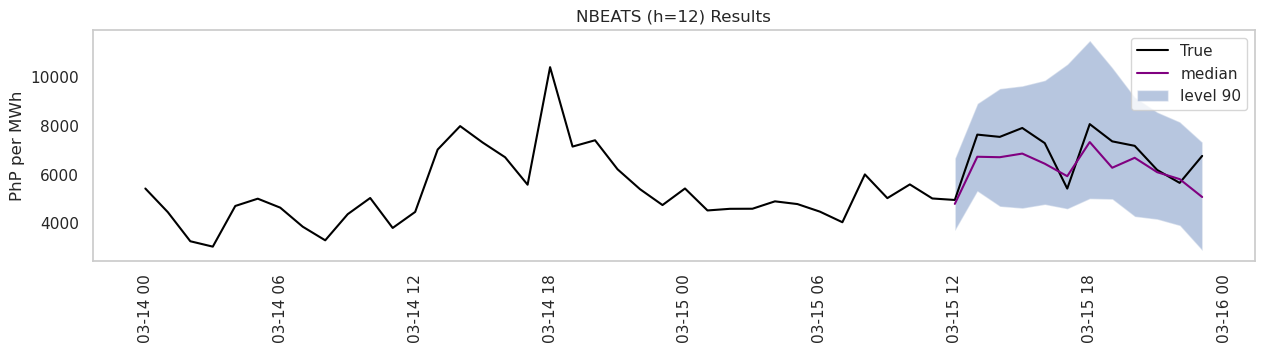

In [53]:
# Plot quantile predictions
plot_df = Y_test_df.merge(Y_hat_df,on='ds')
plot_df = pd.concat([Y_train_df, plot_df])
plot_df = plot_df[plot_df.unique_id=='CLUZ'].drop('unique_id', axis=1)

plt.figure(figsize=(15,3))
plt.plot(plot_df['ds'][-24*2:], plot_df['y'][-24*2:], c='black', label='True')
plt.plot(plot_df['ds'][-48*2:], plot_df['NBEATS-median'][-48*2:], c='purple', label='median')
plt.fill_between(x=plot_df['ds'][-24:], 
                 y1=plot_df['NBEATS-lo-90'][-24:].values, 
                 y2=plot_df['NBEATS-hi-90'][-24:].values,
                 alpha=0.4, label='level 90')

plt.xticks(rotation=90)
plt.title('NBEATS (h=12) Results')
plt.ylabel('PhP per MWh')
plt.legend()
plt.grid()
plt.plot()

In [54]:
nbeats_mape = mape(Y_test_df.y.values, Y_hat_df['NBEATS-median'].values)
nbeats_mae = mae(Y_test_df.y.values, Y_hat_df['NBEATS-median'].values)

Y_naive = Y_test_df.y.shift(1).values # Shift the actual values by one time step to get the naive predictions
Y_naive[0] = Y_test_df.y.iloc[0]  # Set the first prediction to the first actual value

naive_mape = mape(Y_test_df.y.values, Y_naive)
naive_mae = mae(Y_test_df.y.values, Y_naive)

seasonal_period = 12*2*8
Y_snaive = Y_train_df.y[-seasonal_period:-seasonal_period+12].values  # Set the initial predictions for the first season

snaive_mape = mape(Y_test_df.y.values, Y_snaive)
snaive_mae = mae(Y_test_df.y.values, Y_snaive)

df_metrics = pd.DataFrame({'mape': [nbeats_mape*100, naive_mape*100, snaive_mape*100],
                           'mae': [nbeats_mae, naive_mae, snaive_mae]}, index=['NBEATS (h=12)', 'Naive', 'S.Naive'])

display(df_metrics)

,mape,mae
NBEATS (h=12),10.060718,713.885451
Naive,14.275117,984.690494
S.Naive,11.894727,805.076355


<h4 style="color: #0083b0; font-family: Segoe UI, non-serif;">NHITS (horizon=24)</h4>

In [56]:
%%capture
Y_train_df = ts_lwap_cluz[:-24]
Y_test_df = ts_lwap_cluz[-24:]

horizon = 24 #multi-step forecast
model = NHITS(h=horizon,                   # Forecast horizon
                input_size=7 * horizon,      # Length of input sequence
                loss=MQLoss(level=[90]),
                scaler_type='minmax',
                max_steps=100)

nf = NeuralForecast(
    models=[model],
    freq='H'
)

nf.fit(df=Y_train_df, val_size=48)
Y_hat_df = nf.predict(futr_df=Y_test_df)

[]

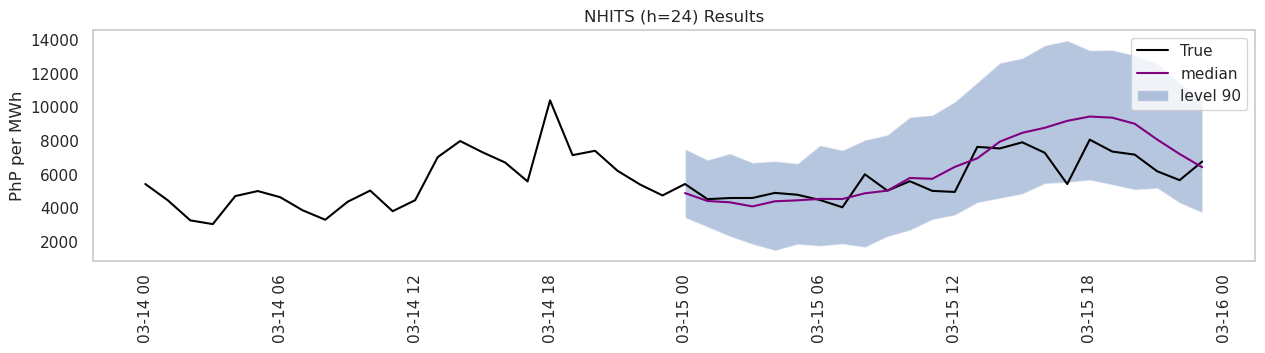

In [57]:
# Plot quantile predictions
plot_df = Y_test_df.merge(Y_hat_df,on='ds')
plot_df = pd.concat([Y_train_df, plot_df])
plot_df = plot_df[plot_df.unique_id=='CLUZ'].drop('unique_id', axis=1)

plt.figure(figsize=(15,3))
plt.plot(plot_df['ds'][-24*2:], plot_df['y'][-24*2:], c='black', label='True')
plt.plot(plot_df['ds'][-48*2:], plot_df['NHITS-median'][-48*2:], c='purple', label='median')
plt.fill_between(x=plot_df['ds'][-24:], 
                 y1=plot_df['NHITS-lo-90'][-24:].values, 
                 y2=plot_df['NHITS-hi-90'][-24:].values,
                 alpha=0.4, label='level 90')

plt.xticks(rotation=90)
plt.title('NHITS (h=24) Results')
plt.ylabel('PhP per MWh')
plt.legend()
plt.grid()
plt.plot()

In [58]:
nhits_mape = mape(Y_test_df.y.values, Y_hat_df['NHITS-median'].values)
nhits_mae = mae(Y_test_df.y.values, Y_hat_df['NHITS-median'].values)

Y_naive = Y_test_df.y.shift(1).values # Shift the actual values by one time step to get the naive predictions
Y_naive[0] = Y_test_df.y.iloc[0]  # Set the first prediction to the first actual value

naive_mape = mape(Y_test_df.y.values, Y_naive)
naive_mae = mae(Y_test_df.y.values, Y_naive)

seasonal_period = 24*8
Y_snaive = Y_train_df.y[-seasonal_period:-seasonal_period+24].values  # Set the initial predictions for the first season

snaive_mape = mape(Y_test_df.y.values, Y_snaive)
snaive_mae = mae(Y_test_df.y.values, Y_snaive)

df_metrics = pd.DataFrame({'mape': [nhits_mape*100, naive_mape*100, snaive_mape*100],
                           'mae': [nhits_mae, naive_mae, snaive_mae]}, index=['NHITS (h=24)', 'Naive', 'S.Naive'])

display(df_metrics)

,mape,mae
NHITS (h=24),15.515212,928.613415
Naive,12.270119,754.115867
S.Naive,12.484803,731.905428


<h4 style="color: #0083b0; font-family: Segoe UI, non-serif;">NHITS (horizon=48)</h4>

In [60]:
%%capture
Y_train_df = ts_lwap_cluz[:-48]
Y_test_df = ts_lwap_cluz[-48:]

horizon = 48 #multi-step forecast
model = NHITS(h=horizon,                   # Forecast horizon
                input_size=7 * horizon,      # Length of input sequence
                loss=MQLoss(level=[90]),
                scaler_type='minmax',
                max_steps=100)

nf = NeuralForecast(
    models=[model],
    freq='H'
)

nf.fit(df=Y_train_df, val_size=48)
Y_hat_df = nf.predict(futr_df=Y_test_df)

[]

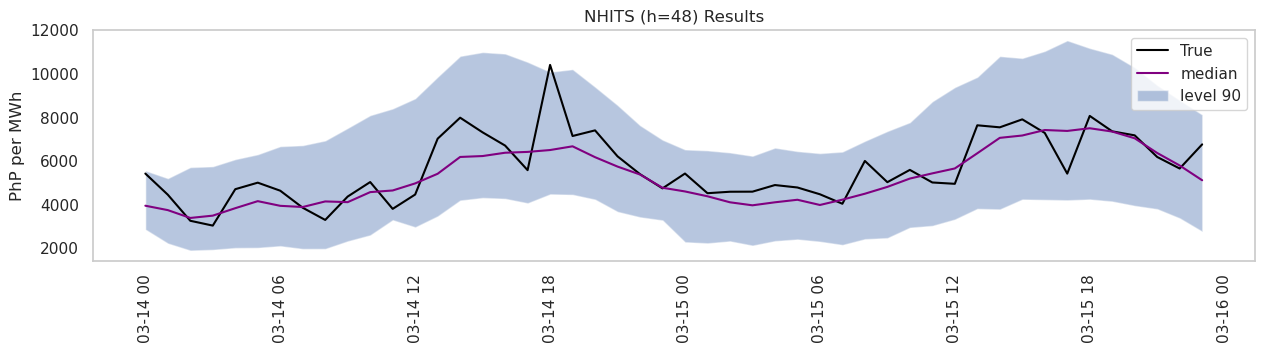

In [64]:
# Plot quantile predictions
plot_df = Y_test_df.merge(Y_hat_df,on='ds')
plot_df = pd.concat([Y_train_df, plot_df])
plot_df = plot_df[plot_df.unique_id=='CLUZ'].drop('unique_id', axis=1)

plt.figure(figsize=(15,3))
plt.plot(plot_df['ds'][-24*2:], plot_df['y'][-24*2:], c='black', label='True')
plt.plot(plot_df['ds'][-48*2:], plot_df['NHITS-median'][-48*2:], c='purple', label='median')
plt.fill_between(x=plot_df['ds'][-48:], 
                 y1=plot_df['NHITS-lo-90'][-48:].values, 
                 y2=plot_df['NHITS-hi-90'][-48:].values,
                 alpha=0.4, label='level 90')

plt.xticks(rotation=90)
plt.title('NHITS (h=48) Results')
plt.ylabel('PhP per MWh')
plt.legend()
plt.grid()
plt.plot()

In [62]:
nhits_mape = mape(Y_test_df.y.values, Y_hat_df['NHITS-median'].values)
nhits_mae = mae(Y_test_df.y.values, Y_hat_df['NHITS-median'].values)

Y_naive = Y_test_df.y.shift(1).values # Shift the actual values by one time step to get the naive predictions
Y_naive[0] = Y_test_df.y.iloc[0]  # Set the first prediction to the first actual value

naive_mape = mape(Y_test_df.y.values, Y_naive)
naive_mae = mae(Y_test_df.y.values, Y_naive)

seasonal_period = 24*8
Y_snaive = Y_train_df.y[-seasonal_period:-seasonal_period+48].values  # Set the initial predictions for the first season

snaive_mape = mape(Y_test_df.y.values, Y_snaive)
snaive_mae = mae(Y_test_df.y.values, Y_snaive)

df_metrics = pd.DataFrame({'mape': [nhits_mape*100, naive_mape*100, snaive_mape*100],
                           'mae': [nhits_mae, naive_mae, snaive_mae]}, index=['NHITS (h=48)', 'Naive', 'S.Naive'])

display(df_metrics)

,mape,mae
NHITS (h=48),12.372397,720.567717
Naive,16.184690,946.785345
S.Naive,15.020309,816.218111


<h2 style="color: #0083b0; font-family: Segoe UI, non-serif;">Results and Discussion</h2>

***

<span style="font-size: 14px; font-family: Segoe UI, non-serif;">
    
As we discuss the results of our experiments, we will look into forecasting error metrics. 
    
The <i>Mean Absolute Percentage Error (MAPE)</i> measures the accuracy of predictions by calculating their mean absolute percentage error. This gives us a relative measure of how different models compare in terms of performance, as it takes into account the scale of data being compared. The lower the MAPE value, the more accurate the model is. 

On the other hand, <i>Mean Absolute Error (MAE)</i> measures prediction accuracy by looking at an average magnitude of errors without considering their direction. A low MAE indicates that our forecasts are closer to actual values and can help us evaluate whether our forecasting methods are working properly or not. 

Both metrics can give us valuable insights on how our models are performing and help us make informed decisions about which one to use for future predictions. It's important to keep track of these metrics to ensure that our predictions remain as accurate as possible.  Knowing how to interpret these two metrics will help you make the most out of your data-driven decisions.  With this knowledge, you can maximize the potential of your forecasting models and develop more reliable forecasts.

<h3 style="color: #0083b0; font-family: Segoe UI, non-serif;">NBEATS Results</h3>

<span style="font-size: 14px; font-family: Segoe UI, non-serif;">
<img src="nbeats-results.png" alt="NBEATS (h=24) Results" width="800">
<div style="text-align: center; color: gray; font-size: 14px; font-family: Segoe UI, sans-serif;">
Figure 3. NBEATS (h=24 and h=12) Results
</div>
    
The NBEATS model we're using to forecast electrical prices delivers impressively accurate predictions overall. This can be seen in the graph above, which clearly shows that the purple line representing our median predicted prices closely follows the black line representing the actual market prices. Furthermore, the shaded area provides an indication of how confident we are in these predictions; with a 90% confidence interval, it's clear that our NBEATS model is providing reliable insights. 

However, while this is impressive accuracy overall, it's important to note that there are still some discrepancies between our predictions and actual market prices at certain points throughout the graph. These could be attributed to external factors such as changes in demand or supply affecting price dynamics - something that our NBEATS model is unable to consider. Despite this, the NBEATS model still offers a great way to get an insight into future market prices and plan accordingly. 

The NBEATS model did show promising results for short-term forecasting. However, when we extend the forecast horizon to 24 hours, its performance is slightly diminished. The average percentage error (MAPE) increases to 12.6%, and the average absolute error (MAE) rises to 772.7 – indicating that on average, the predictions are more than 12.6% off from the actual prices when predicting 24 hours into the future. Despite this, the model still produces relatively accurate predictions of price movements in the short-term. Thus, it could be a useful tool for traders who wish to take advantage of market movements within a timeframe of 12 – 24 hours. 

In addition, since NBEATS is a fully automated machine learning model with no need for parameter tuning or feature engineering, it can reduce the time needed to build and maintain forecasting models. This makes it an attractive solution for organizations that want to quickly generate high-quality forecasts from their data. Ultimately, NBEATS shows promise as an effective forecasting tool that can help traders make informed decisions about their investments in the near future.
    
The reason for this drop in performance is likely due to the fact that the NBEATS model is not able to capture long-term trends in the data. The model is only able to learn short-term patterns, and it is therefore not able to make accurate predictions when the data is changing rapidly.

To address this issue, we have investigated another model, NHITS, which (as mentioned in the model overview section) is an extension of NBEATS that is specifically designed for long-term forecasting.
</span>  

<h3 style="color: #0083b0; font-family: Segoe UI, non-serif;">NHITS Results</h3>

<span style="font-size: 14px; font-family: Segoe UI, non-serif;">
<img src="nhits-results.png" alt="NBEATS (h=24) Results" width="800">
<div style="text-align: center; color: gray; font-size: 14px; font-family: Segoe UI, sans-serif;">
Figure 4. NHITS (h=24 and h=48) Results
</div>
    
NHITS designed to address the issue of long-term forecasting by utilizing a hierarchical approach that focuses on capturing both short- and long-term trends. By using this model, we are able to provide more accurate predictions than NBEATS, which can only learn short-term patterns. NHITS will allow us to better capture the longer term trends in our dataset, providing us with much more accurate predictions over time. 
    
In our results, NHITS is proving to be a better option than both the Naive and Simple Naive models when it comes to forecasting 48 hours into the future. In this case, NHITS has a MAPE of 12.4% and MAE of 720.6. This means that NHITS's design, specifically for long-term forecasting, is effective in this context even more so than NBEATS - demonstrating its superiority over other methods! If you're looking to make predictions two days ahead, NHITS is definitely your best bet for accuracy and reliability.
</span>  

<h2 style="color: #0083b0; font-family: Segoe UI, non-serif;">Explainability - Demand Forecasting</h2>

***

<span style="font-size: 14px; font-family: Segoe UI, non-serif;">
Next, we consider the SHAP on demand forecasting. SHAP (SHapley Additive exPlanations) demand forecasting provides a great way to interpret machine learning models and understand the impact of each feature. This type of analysis is especially useful for demand forecasting, which can be affected by numerous factors. By using SHAP values, we can get a better understanding of the underlying features that contribute to the model’s predictions for each individual observation. With this knowledge, businesses can make more informed decisions about their inventory needs and how to best respond to changes in demand. Ultimately, SHAP on demand forecasting helps organizations make better decisions and improve their supply chain operations. Therefore, it is worth exploring further! 



<h3 style="color: #0083b0; font-family: Segoe UI, non-serif;">Loading Demand Data</h3>

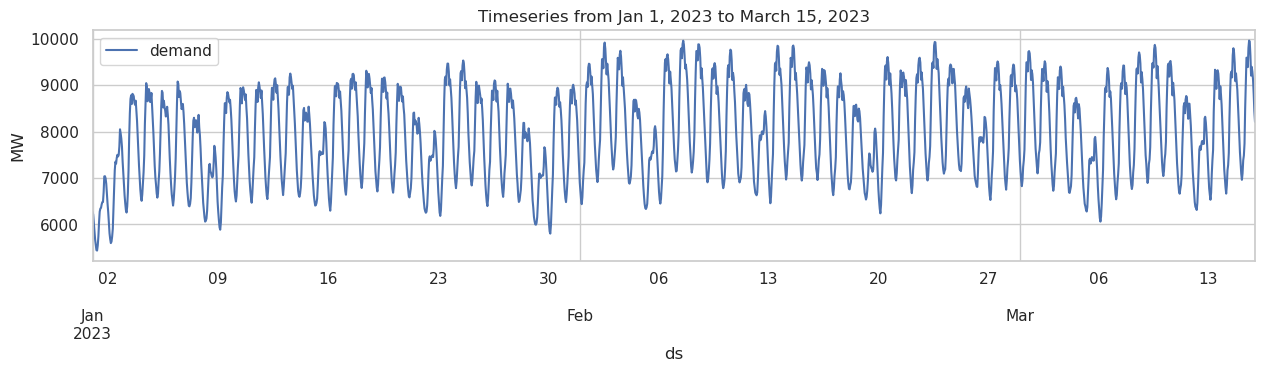

In [67]:
ts_demand_cluz = pd.read_csv('demand_cluz_2023Q1.csv')
ts_demand_cluz['ds'] = pd.to_datetime(ts_demand_cluz['ds'])
ts_demand_cluz.set_index('ds', inplace=True)

# Choose same start and end date as lwap data
mask = (ts_demand_cluz.index >= start_date) & (ts_demand_cluz.index <= end_date)
ts_demand_cluz = ts_demand_cluz.loc[mask]

ts_demand_cluz.plot(figsize=(15,3))
plt.title('Timeseries from Jan 1, 2023 to March 15, 2023')
plt.ylabel('MW')
plt.show()

In [68]:
ts_demand_cluz.reset_index(inplace=True)
ts_demand_cluz.rename(columns={'index':'ds'}, inplace=True)

<h3 style="color: #0083b0; font-family: Segoe UI, non-serif;">Loading Weather Data</h3>

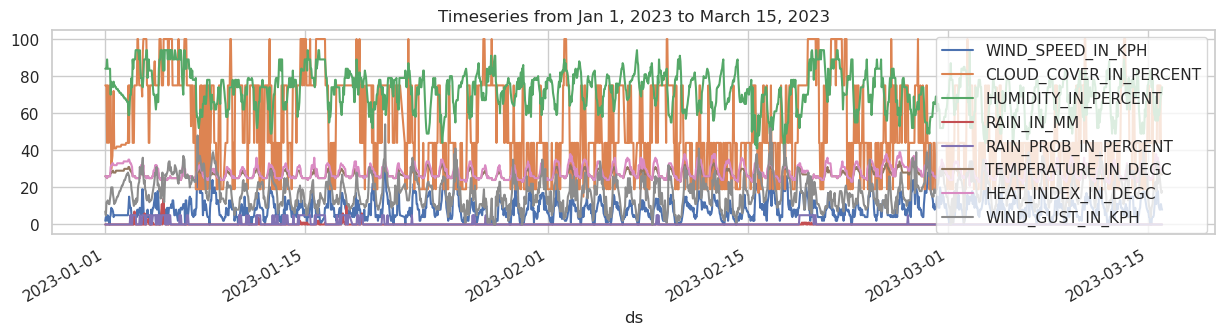

In [69]:
ts_weather_cluz = pd.read_csv('weather_cluz_2023Q1.csv')
ts_weather_cluz['ds'] = pd.to_datetime(ts_weather_cluz['ds'])
ts_weather_cluz.set_index('ds', inplace=True)

# Choose same start and end date
mask = (ts_weather_cluz.index >= start_date) & (ts_weather_cluz.index <= end_date)
ts_weather_cluz = ts_weather_cluz.loc[mask]

ts_weather_cluz.plot(figsize=(15,3))
plt.title('Timeseries from Jan 1, 2023 to March 15, 2023')
plt.show()

In [70]:
ts_weather_cluz.reset_index(inplace=True)
ts_weather_cluz.rename(columns={'index':'ds'}, inplace=True)

<h3 style="color: #0083b0; font-family: Segoe UI, non-serif;">Merge Weather and Demand Data</h3>

In [71]:
demand_weather = pd.merge(ts_demand_cluz, ts_weather_cluz, how='left', on='ds')

# Extract year, month, quarter, day, weekday from start
demand_weather['Month'] = demand_weather['ds'].dt.month
demand_weather['Day'] = demand_weather['ds'].dt.day
demand_weather['Hour'] = demand_weather['ds'].dt.hour

demand_weather.fillna(demand_weather.mean(), inplace=True)  # Fills NA values with the mean of the column

<h3 style="color: #0083b0; font-family: Segoe UI, non-serif;">SHAP Implementation</h3>

In [72]:
df_basic = demand_weather.copy()

import math

# Firstly, we will define a new dataset equal to the existing one, 
# but omitting the last two records, later we will use the model to predict such values.
new_df=df_basic[:-2]

train_len = math.ceil(len(new_df)*0.70)

features = ['WIND_SPEED_IN_KPH', 'CLOUD_COVER_IN_PERCENT', 'HUMIDITY_IN_PERCENT', 'RAIN_IN_MM',
       'RAIN_PROB_IN_PERCENT', 'TEMPERATURE_IN_DEGC', 'HEAT_INDEX_IN_DEGC',
       'WIND_GUST_IN_KPH', 'Month', 'Day', 'Hour']

X_train = new_df[features][0:train_len]
y_train = new_df['demand'][0:train_len]

X_val = new_df[features][train_len:]
y_val = new_df['demand'][train_len:]

X_test = df_basic[features][-2:]
y_test = df_basic['demand'][-2:]

print('X_train: ', len(X_train))
print('X_val: ', len(X_val))
print('X_test: ', len(X_test))

X_train:  1242
X_val:  532
X_test:  2


In [73]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

#For purpose of Demonstration let's just use the default setting of the following models
LR = LinearRegression()
LR.fit(X_train, y_train)

Lasso_model = Lasso()
Lasso_model.fit(X_train, y_train)

Ridge1 = Ridge()
Ridge1.fit(X_train, y_train)

#kNN = KNeighborsRegressor(n_neighbors=8) 
kNN = KNeighborsRegressor() 
kNN.fit(X_train,y_train)

#DT = DecisionTreeRegressor(max_depth=5)
DT = DecisionTreeRegressor() 
DT.fit(X_train,y_train)

#RF = RandomForestRegressor(n_estimators = 100) 
RF = RandomForestRegressor() 
RF.fit(X_train,y_train)

#GBM = GradientBoostingRegressor(max_depth =4, learning_rate=.2) 
GBM = GradientBoostingRegressor() 
GBM.fit(X_train,y_train)

#XGBoost Regressor
XGB = XGBRegressor(objective ='reg:linear', verbosity = 0, random_state=42)
# XGB = XGBRegressor()
XGB.fit(X_train, y_train)

y2_val_LR = LR.predict(X_val)
y2_val_Lasso = Lasso_model.predict(X_val)
y2_val_Ridge = Ridge1.predict(X_val)
y2_val_kNN = kNN.predict(X_val)
y2_val_DT = DT.predict(X_val)
y2_val_RF = RF.predict(X_val)
y2_val_GBM = GBM.predict(X_val)
y2_val_XGB = XGB.predict(X_val)

cols2 = ['Machine Learning Regression Method','Train Score','Val Score']
model_val = pd.DataFrame(columns=cols2)

model_val.loc[0] = ['Linear Regression', LR.score(X_train, y_train), LR.score(X_val, y_val)]
model_val.loc[1] = ['Linear Regression + Lasso', Lasso_model.score(X_train, y_train), Lasso_model.score(X_val, y_val)]
model_val.loc[2] = ['Linear Regression + Ridge', Ridge1.score(X_train, y_train), Ridge1.score(X_val, y_val)]
model_val.loc[3] = ['kNN', kNN.score(X_train, y_train), kNN.score(X_val, y_val)]
model_val.loc[4] = ['Decision Tree',DT.score(X_train, y_train), DT.score(X_val, y_val)]
model_val.loc[5] = ['Random Forest',RF.score(X_train, y_train), RF.score(X_val, y_val)]
model_val.loc[6] = ['Gradient Boosting Method',GBM.score(X_train, y_train), GBM.score(X_val, y_val)]
model_val.loc[7] = ['XGBoost Regressor',XGB.score(X_train, y_train), XGB.score(X_val, y_val)]

model_val

,Machine Learning Regression Method,Train Score,Val Score
0,Linear Regression,0.590256,0.522398
1,Linear Regression + Lasso,0.590248,0.527463
2,Linear Regression + Ridge,0.590256,0.524085
3,kNN,0.797032,0.585135
4,Decision Tree,1.000000,0.743910
5,Random Forest,0.984194,0.821349
6,Gradient Boosting Method,0.900474,0.769354
7,XGBoost Regressor,0.999060,0.849136


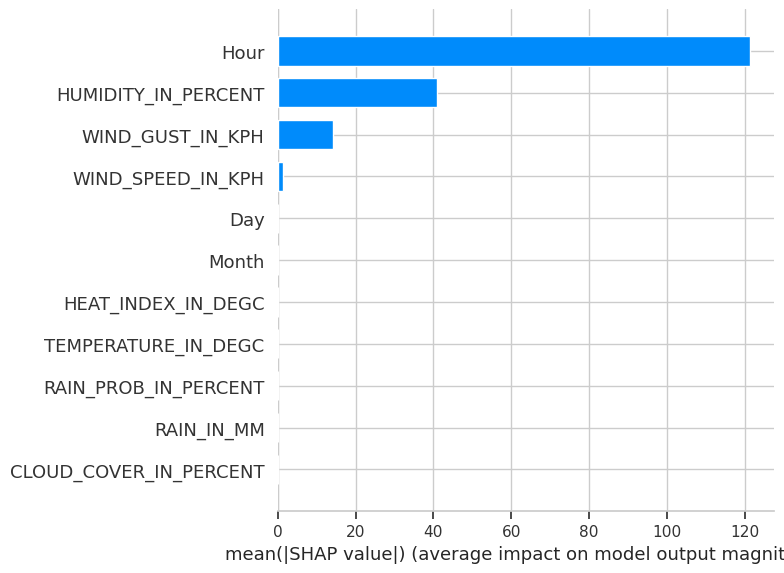

In [74]:
# Create an explainer object
explainer = shap.Explainer(XGB, X_test)

# Compute SHAP values
shap_values = explainer(X_test)

# Plot the SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [75]:
import numpy as np
shap_values_abs_mean = np.abs(shap_values.values).mean(axis=0)

shap_values_abs_mean

array([  1.32257433,   0.        ,  40.98613167,   0.        ,
         0.        ,   0.        ,   0.        ,  14.2397503 ,
         0.        ,   0.        , 121.47515076])

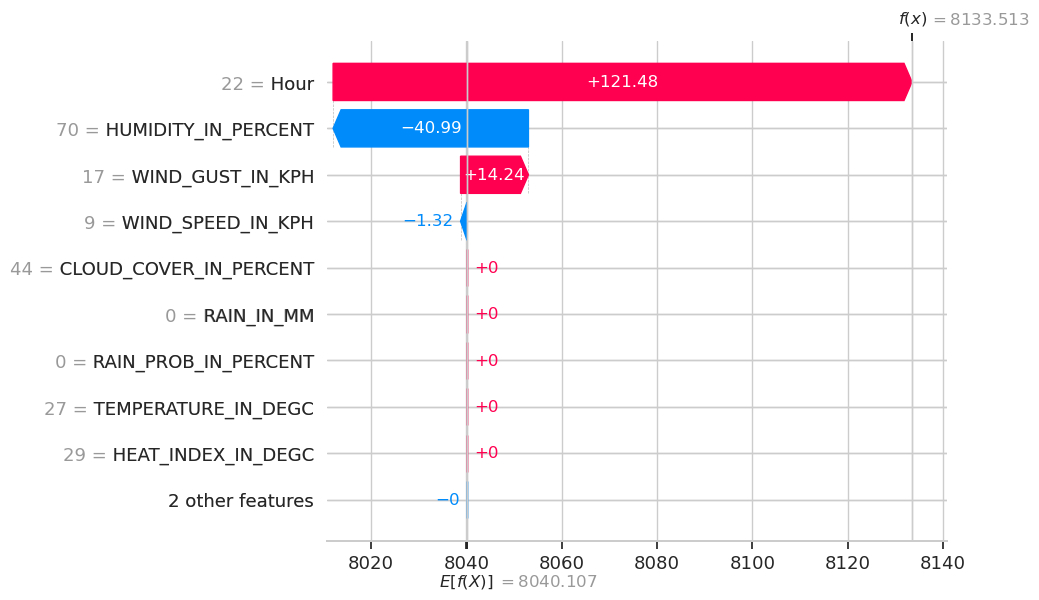

In [76]:
shap_explanation = shap.Explanation(shap_values, 
                                    base_values=explainer.expected_value, 
                                    data=X_test,
                                    feature_names=X_test.columns)

# Create a waterfall plot for the first instance in the test set
shap.plots.waterfall(shap_explanation[0], max_display=10)  # Adjust max_display as needed

# Show the plot
plt.show()

<span style="font-size: 14px; font-family: Segoe UI, non-serif;">

It is interesting to see the impact that different weather conditions have on electricity demand. According to our analysis, the hour of the day has the most substantial influence on electricity demand. As expected, as the hour increases throughout the day, so does the electricity demand - with an SHAP value of around 121.47, it’s clear that time is a big factor in how much electricity is being used!

On the other hand, humidity presents us with a different story. Our data showed that as humidity increases, electricity demand decreases - with a negative SHAP value around -40.98. It makes sense; when it’s hot and sticky outside, we don’t tend to use too many appliances that require electricity. Read more about [humidity and electricity demand here.](https://www.nature.com/articles/s41467-020-15393-8).

Finally, wind gusts also have a bearing on electricity demand - with a positive SHAP value of around 14.24, our results show that the windier it gets, the more electricity is being used! This could be due to people using more fans and air-conditioning units to keep cool in these conditions. Read more about [wind gusts and electricity demand here.](https://www.samsung.com/ph/air-conditioners/wall-mount/ar9500t-wind-free-ar10byhamwkntc/)

It’s fascinating to see how different parts of our environment can influence electricity demand in such an obvious way. It just goes to show why it’s so important for energy companies to understand these patterns and plan accordingly! 

Overall, this analysis has provided us with useful insights into how certain weather conditions have an impact on electricity usage. Time has the most significant influence on electricity demand, with increasing hours leading to more usage.

<h2 style="color: #0083b0; font-family: Segoe UI, non-serif;">Next Steps</h2>

***

<span style="font-size: 14px; font-family: Segoe UI, non-serif;">
    
Deep learning-based forecasting methods gained great interest in the recent years due to their ability to capture long-term dependencies. These models have been proven successful on a variety of tasks such as natural language processing, but they've also become increasingly popular in time series forecasting. Therefore, if you would like to explore more advanced techniques, we suggest you check out the Transformer-based models for time series forecasting, we suggest you check out Google’s Neural Network Autoregressive Distribution Estimator (NNARDE) and Microsoft’s Deep4Cast forecasting library. 

Another real question now is how data scientists, analysts, and managers (like you!) can put forward these methods and influence the management and business to adapt. As I end this blog, I am sharing tips on how you can do so:
    
<i>How can a senior manager can help in enhancing forecast accuracy through the following strategies and processes?</i>
- Having an analytical mindset and data-driven culture is only half the battle when it comes to improving forecast accuracy. Senior management also needs to invest in advanced analytics tools and technologies to maximize results. 
- Machine learning and deep learning are two of the most effective techniques for forecasting energy spot prices, as they provide more accurate predictions than traditional statistical methods. N-BEATS is a relatively new machine learning technique that has already demonstrated its capabilities in providing highly accurate forecasts. Investing in this technology can help senior management teams make better decisions about market trends and pricing strategies.  
- By investing in advanced analytics tools, senior management teams can boost their understanding of market dynamics and create reliable forecasts for future energy spot prices. Of course, having a data-driven culture is also essential for improving accuracy and making the most of these technologies. Senior management teams should strive to foster an analytical mindset in their decision-making processes and ensure that data always takes precedence over speculation or intuition. 
    
<i>Develop an efficient and comprehensive forecasting strategy combining different techniques for maximum accuracy. </i>
- Once the data is preprocessed, the next step is to choose a model that best suits the forecasting task. There are several techniques available for spot energy price forecasting, such as N-BEATS, ARIMA, and LSTM. Each of these models uses different algorithms and parameters that can be tuned for maximum accuracy. In order to properly select a model, it is important to understand the data points that have been collected and identify which types of models will work best with those data points. At the same time, it is important to remember that careful data preparation is essential when working with any time series dataset. We would encourage the readers to try out these models with other datasets; however, always ensure the credibility of the source and maintain vigilance for any data inconsistencies or missing values, as these could significantly affect your model's performance and accuracy. 
    
- When training and tuning these models, it is also important to consider stakeholder interpretability - in other words, making sure that the results from the model are clearly understandable for all stakeholders involved. This could involve providing visualizations of the results, or providing the SHAP values (SHapley Additive exPlanations) as demonstrated in this study, so that all stakeholders can understand how the model works. By doing this, it allows for better communication between different parties and helps them make informed decisions based on the results presented. 
- Finally, after training and tuning a model with suitable accuracy for predicting spot energy prices, it is important to monitor its performance over time in order to detect any unexpected changes and adjust accordingly if needed. This helps ensure that the forecasting strategy remains valid and up-to-date with market trends. 

By following these steps, organizations can develop an efficient and comprehensive forecasting strategy that will help them predict energy spot prices with greater accuracy. With a reliable forecasting system in place, organizations can achieve their competitive advantage.